In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('C:\\Users\\Sunny\\Desktop\\Career Launcher\\Module 1\\ITC.csv')
df.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,ITC,EQ,15-May-2017,274.95,275.90,278.90,275.50,278.50,277.95,277.78,5462855,1.517477e+09,52501,4128324,75.57
1,ITC,EQ,16-May-2017,277.95,278.50,284.30,278.00,283.00,283.45,280.93,11204308,3.147583e+09,98347,8307567,74.15
2,ITC,EQ,17-May-2017,283.45,284.10,284.40,279.25,281.50,281.65,281.56,8297700,2.336261e+09,99107,5924804,71.40
3,ITC,EQ,18-May-2017,281.65,278.00,281.05,277.05,277.65,277.90,278.49,7924261,2.206822e+09,47830,5434449,68.58
4,ITC,EQ,19-May-2017,277.90,282.25,295.65,281.95,286.40,286.20,290.08,35724128,1.036268e+10,248579,19137631,53.57


In [3]:
Rolling_20 = df['Close Price'].rolling(20).mean()
df['BL'] = Rolling_20 - 2*df['Close Price'].rolling(20).std()
df['BU'] = Rolling_20 + 2*df['Close Price'].rolling(20).std()
df['BM'] = (df['BL'] + df['BU'])/2
df.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,BL,BU,BM
0,ITC,EQ,15-May-2017,274.95,275.90,278.90,275.50,278.50,277.95,277.78,5462855,1.517477e+09,52501,4128324,75.57,NaN,NaN,NaN
1,ITC,EQ,16-May-2017,277.95,278.50,284.30,278.00,283.00,283.45,280.93,11204308,3.147583e+09,98347,8307567,74.15,NaN,NaN,NaN
2,ITC,EQ,17-May-2017,283.45,284.10,284.40,279.25,281.50,281.65,281.56,8297700,2.336261e+09,99107,5924804,71.40,NaN,NaN,NaN
3,ITC,EQ,18-May-2017,281.65,278.00,281.05,277.05,277.65,277.90,278.49,7924261,2.206822e+09,47830,5434449,68.58,NaN,NaN,NaN
4,ITC,EQ,19-May-2017,277.90,282.25,295.65,281.95,286.40,286.20,290.08,35724128,1.036268e+10,248579,19137631,53.57,NaN,NaN,NaN


In [4]:
df.dropna(inplace=True)
df.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,BL,BU,BM
19,ITC,EQ,09-Jun-2017,311.60,310.75,312.60,304.70,305.70,306.00,307.40,10065468,3.094129e+09,103882,5925048,58.87,275.080851,329.999149,302.5400
20,ITC,EQ,12-Jun-2017,306.00,307.00,307.50,302.50,304.25,304.40,304.65,6266299,1.909038e+09,50916,3786983,60.43,278.961287,328.763713,303.8625
21,ITC,EQ,13-Jun-2017,304.40,305.05,306.00,302.20,305.10,305.25,304.21,5107002,1.553585e+09,69676,3255923,63.75,281.979622,327.925378,304.9525
22,ITC,EQ,14-Jun-2017,305.25,304.95,306.00,299.15,299.80,299.85,300.77,14574048,4.383431e+09,84216,11919899,81.79,285.480390,326.244610,305.8625
23,ITC,EQ,15-Jun-2017,299.85,302.95,302.95,299.50,302.55,301.90,300.84,7427656,2.234554e+09,68964,4842397,65.19,291.312517,322.812483,307.0625


In [5]:
def f(x):
    if x['Close Price'] < x['BL']:
        return ('Buy')
    elif x['Close Price'] > x['BU']:
        return ('Short')
    elif (x['Close Price']>x['BL']) & (x['Close Price'] < x['BM']):
        return('Hold Buy/Liquidate Short')
    elif (x['Close Price'] > x['BM']) & (x['Close Price'] < x['BU']):
        return('Hold Short/Liquidate Buy')
    else: 
        pass

In [6]:
df['Call'] = df.apply(f, axis=1)
df.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,BL,BU,BM,Call
19,ITC,EQ,09-Jun-2017,311.60,310.75,312.60,304.70,305.70,306.00,307.40,10065468,3.094129e+09,103882,5925048,58.87,275.080851,329.999149,302.5400,Hold Short/Liquidate Buy
20,ITC,EQ,12-Jun-2017,306.00,307.00,307.50,302.50,304.25,304.40,304.65,6266299,1.909038e+09,50916,3786983,60.43,278.961287,328.763713,303.8625,Hold Short/Liquidate Buy
21,ITC,EQ,13-Jun-2017,304.40,305.05,306.00,302.20,305.10,305.25,304.21,5107002,1.553585e+09,69676,3255923,63.75,281.979622,327.925378,304.9525,Hold Short/Liquidate Buy
22,ITC,EQ,14-Jun-2017,305.25,304.95,306.00,299.15,299.80,299.85,300.77,14574048,4.383431e+09,84216,11919899,81.79,285.480390,326.244610,305.8625,Hold Buy/Liquidate Short
23,ITC,EQ,15-Jun-2017,299.85,302.95,302.95,299.50,302.55,301.90,300.84,7427656,2.234554e+09,68964,4842397,65.19,291.312517,322.812483,307.0625,Hold Buy/Liquidate Short


In [7]:
X = df[['BL', 'BU', 'BM', 'Close Price']]
y = df.Call

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [9]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [10]:
model.score(x_test, y_test)

0.8229166666666666

In [11]:
from sklearn import tree
model_1 = tree.DecisionTreeClassifier()

In [12]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

In [13]:
model_1.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [14]:
model_1.score(x_test, y_test)

0.8229166666666666

In [15]:
from sklearn.linear_model import LogisticRegression
model_2 = LogisticRegression()

In [16]:
x_train,x_test,y_train,y_test = train_test_split(X,y,train_size=0.2)

In [17]:
model_2.fit(x_train, y_train)

C:\Users\Sunny\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [18]:
model_2.predict(x_test)

array(['Hold Buy/Liquidate Short', 'Hold Short/Liquidate Buy',
       'Hold Short/Liquidate Buy', 'Hold Buy/Liquidate Short',
       'Hold Buy/Liquidate Short', 'Hold Buy/Liquidate Short',
       'Hold Short/Liquidate Buy', 'Hold Buy/Liquidate Short',
       'Hold Short/Liquidate Buy', 'Hold Short/Liquidate Buy',
       'Hold Short/Liquidate Buy', 'Hold Short/Liquidate Buy',
       'Hold Short/Liquidate Buy', 'Hold Short/Liquidate Buy',
       'Hold Buy/Liquidate Short', 'Short', 'Buy',
       'Hold Short/Liquidate Buy', 'Hold Short/Liquidate Buy',
       'Hold Buy/Liquidate Short', 'Short', 'Hold Buy/Liquidate Short',
       'Hold Buy/Liquidate Short', 'Hold Buy/Liquidate Short',
       'Hold Buy/Liquidate Short', 'Short', 'Hold Buy/Liquidate Short',
       'Hold Buy/Liquidate Short', 'Hold Buy/Liquidate Short',
       'Hold Short/Liquidate Buy', 'Hold Buy/Liquidate Short',
       'Hold Short/Liquidate Buy', 'Hold Short/Liquidate Buy',
       'Hold Buy/Liquidate Short', 'Hold Buy/Liqu

In [19]:
from sklearn.svm import SVC
model_3 = SVC()

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [21]:
model_3.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [22]:
model_3.score(X_test, y_test)

0.8125

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=42)

In [24]:
from sklearn.neighbors import KNeighborsClassifier
model_4 = KNeighborsClassifier(n_neighbors=7) 
model_4.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [25]:

model_4.score(X_test, y_test)

0.875

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1)

In [27]:
from sklearn.naive_bayes import GaussianNB 
gnb = GaussianNB() 
gnb.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [28]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
y_pred = gnb.predict(X_test) 
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)

Gaussian Naive Bayes model accuracy(in %): 50.0


In [29]:
df2 = pd.read_csv('C:\\Users\\Sunny\\Downloads\\Large_Cap\\Large_Cap\\TCS.csv')
df2 = df2[df2.Series == 'EQ']

In [30]:
df2['MA20'] = df2['Close Price'].rolling(window=20).mean()
df2['20dSTD'] = df2['Close Price'].rolling(window=20).std() 

df2['Upper'] = df2['MA20'] + (df2['20dSTD'] * 2)
df2['Lower'] = df2['MA20'] - (df2['20dSTD'] * 2)
df2['Middle'] =  (df2['Upper'] + df2['Lower'])/2

In [31]:
df2 = df2.loc[19:497,:].reset_index()
df2.head()

,index,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,...,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,MA20,20dSTD,Upper,Lower,Middle
0,19,TCS,EQ,09-Jun-2017,2521.60,2520.0,2547.4,2486.0,2518.6,2507.00,...,1574017,3.955950e+09,83931,599286,38.07,2542.0425,71.824613,2685.691727,2398.393273,2542.0425
1,20,TCS,EQ,12-Jun-2017,2507.00,2497.0,2512.9,2470.4,2484.9,2487.20,...,813253,2.022948e+09,44849,306655,37.71,2548.1475,60.249637,2668.646775,2427.648225,2548.1475
2,21,TCS,EQ,13-Jun-2017,2487.20,2465.0,2481.1,2447.0,2450.0,2451.55,...,587707,1.448635e+09,52410,268108,45.62,2549.2675,58.090647,2665.448793,2433.086207,2549.2675
3,22,TCS,EQ,14-Jun-2017,2451.55,2455.0,2476.0,2455.0,2465.4,2470.20,...,744571,1.838651e+09,42987,456486,61.31,2550.0100,56.909942,2663.829884,2436.190116,2550.0100
4,23,TCS,EQ,15-Jun-2017,2470.20,2469.0,2469.7,2405.0,2410.0,2411.20,...,1498599,3.638509e+09,65157,1140716,76.12,2543.7600,64.820537,2673.401074,2414.118926,2543.7600


In [32]:
df2.drop(['Prev Close','Open Price','High Price','Low Price','Last Price','Total Traded Quantity','Series','Symbol','Date','Turnover','No. of Trades','Deliverable Qty','% Dly Qt to Traded Qty','index'], axis = 1, inplace =True)

In [33]:
df2.drop(['MA20','20dSTD','Average Price'], axis = 1, inplace = True)
df2.head()

,Close Price,Upper,Lower,Middle
0,2507.00,2685.691727,2398.393273,2542.0425
1,2487.20,2668.646775,2427.648225,2548.1475
2,2451.55,2665.448793,2433.086207,2549.2675
3,2470.20,2663.829884,2436.190116,2550.0100
4,2411.20,2673.401074,2414.118926,2543.7600


In [34]:
df2['Call_TCS'] = df2['Middle']

In [35]:
x_train = df[['BL', 'BU', 'BM', 'Close Price']]
y_train = df.Call
x_test = df2.loc[0:475,'Close Price':'Middle']
y_test = df2.loc[0:475,'Call_TCS']

In [36]:
model_5 = RandomForestClassifier()  
model_5.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [37]:
df2['fill_values'] = model_5.predict(x_test)
df2

,Close Price,Upper,Lower,Middle,Call_TCS,fill_values
0,2507.00,2685.691727,2398.393273,2542.0425,2542.0425,Hold Short/Liquidate Buy
1,2487.20,2668.646775,2427.648225,2548.1475,2548.1475,Hold Short/Liquidate Buy
2,2451.55,2665.448793,2433.086207,2549.2675,2549.2675,Hold Short/Liquidate Buy
3,2470.20,2663.829884,2436.190116,2550.0100,2550.0100,Hold Short/Liquidate Buy
4,2411.20,2673.401074,2414.118926,2543.7600,2543.7600,Hold Short/Liquidate Buy
...,...,...,...,...,...,...
470,2151.95,2276.078263,1978.471737,2127.2750,2127.2750,Hold Short/Liquidate Buy
471,2152.85,2273.480385,1994.904615,2134.1925,2134.1925,Hold Short/Liquidate Buy
472,2172.55,2274.551165,2006.258835,2140.4050,2140.4050,Hold Short/Liquidate Buy
473,2135.80,2273.786975,2013.528025,2143.6575,2143.6575,Hold Short/Liquidate Buy


In [38]:
df3 = pd.read_csv("C:\\Users\\Sunny\\Desktop\\Career Launcher\\Module 1\\ITC.csv")
df3 = df3[df3.Series == 'EQ']

In [39]:
df3.drop(['Total Traded Quantity','Series','Symbol','Date','Turnover','No. of Trades','Deliverable Qty','% Dly Qt to Traded Qty'], axis = 1, inplace =True)

In [40]:
df3.head().reset_index()

,index,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price
0,0,274.95,275.90,278.90,275.50,278.50,277.95,277.78
1,1,277.95,278.50,284.30,278.00,283.00,283.45,280.93
2,2,283.45,284.10,284.40,279.25,281.50,281.65,281.56
3,3,281.65,278.00,281.05,277.05,277.65,277.90,278.49
4,4,277.90,282.25,295.65,281.95,286.40,286.20,290.08


In [41]:
df3.drop(['Prev Close','Average Price','Last Price'], axis =1, inplace = True)

In [42]:
df3.head()

,Open Price,High Price,Low Price,Close Price
0,275.90,278.90,275.50,277.95
1,278.50,284.30,278.00,283.45
2,284.10,284.40,279.25,281.65
3,278.00,281.05,277.05,277.90
4,282.25,295.65,281.95,286.20


In [43]:
df3["Close_yesterday"] = df3["Close Price"].shift(1)
df3

,Open Price,High Price,Low Price,Close Price,Close_yesterday
0,275.90,278.90,275.50,277.95,NaN
1,278.50,284.30,278.00,283.45,277.95
2,284.10,284.40,279.25,281.65,283.45
3,278.00,281.05,277.05,277.90,281.65
4,282.25,295.65,281.95,286.20,277.90
...,...,...,...,...,...
491,308.25,309.50,300.85,301.90,307.00
492,300.00,303.40,298.65,300.65,301.90
493,299.40,301.30,296.35,299.85,300.65
494,300.00,300.45,296.90,297.75,299.85


In [44]:
def apna(x):
    if x['Close Price'] < x['Close_yesterday']:
        return -1
    elif x['Close Price'] > x['Close_yesterday']:
        return 1
    else:
        pass

In [45]:
df3['Action'] = df3.apply(apna, axis=1)
df3.drop('Close_yesterday', axis =1 ,inplace = True)
df3

,Open Price,High Price,Low Price,Close Price,Action
0,275.90,278.90,275.50,277.95,NaN
1,278.50,284.30,278.00,283.45,1.0
2,284.10,284.40,279.25,281.65,-1.0
3,278.00,281.05,277.05,277.90,-1.0
4,282.25,295.65,281.95,286.20,1.0
...,...,...,...,...,...
491,308.25,309.50,300.85,301.90,-1.0
492,300.00,303.40,298.65,300.65,-1.0
493,299.40,301.30,296.35,299.85,-1.0
494,300.00,300.45,296.90,297.75,-1.0


In [46]:

df3 = df3.loc[1:495,:]
df3

,Open Price,High Price,Low Price,Close Price,Action
1,278.50,284.30,278.00,283.45,1.0
2,284.10,284.40,279.25,281.65,-1.0
3,278.00,281.05,277.05,277.90,-1.0
4,282.25,295.65,281.95,286.20,1.0
5,292.45,304.80,291.30,303.60,1.0
...,...,...,...,...,...
491,308.25,309.50,300.85,301.90,-1.0
492,300.00,303.40,298.65,300.65,-1.0
493,299.40,301.30,296.35,299.85,-1.0
494,300.00,300.45,296.90,297.75,-1.0


In [47]:
df4 = df3.pct_change()*100

In [48]:
df4['%CO'] = df4['Close Price'] - df4['Open Price']
df4['%HL'] = df4['High Price'] - df4['Low Price']

In [49]:
df4 = df4.loc[1:495,:]
df4['MA5'] = df4['Close Price'].rolling(window=5).mean()
df4['5dSTD'] = df4['Close Price'].rolling(window=5).std()
df4.head()

,Open Price,High Price,Low Price,Close Price,Action,%CO,%HL,MA5,5dSTD
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.010772,0.035174,0.449640,-0.635033,-200.0,-2.645805,-0.414466,NaN,NaN
3,-2.147131,-1.177918,-0.787825,-1.331440,0.0,0.815692,-0.390094,NaN,NaN
4,1.528777,5.194805,1.768634,2.986686,-200.0,1.457909,3.426171,NaN,NaN
5,3.613818,3.094876,3.316191,6.079665,0.0,2.465847,-0.221315,NaN,NaN


In [50]:
df5 = pd.concat([df3.Action, df4], axis = 1)

In [51]:
df5 = df5.loc[6:495,:]

In [52]:
df5 = df5.reset_index()

In [53]:
df5.drop(['index'], axis = 1, inplace = True)
df5.dropna(inplace=True)

In [54]:
x_train, x_test, y_train, y_test = train_test_split(df5.drop(['Action','Close Price','Open Price','High Price','Low Price'],axis='columns'),df5.Action,test_size=0.2)

In [55]:
model_6 = RandomForestClassifier()
model_6.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [57]:
df5['Cumulative'] = df5['%CO']/df5['Open Price']*100

Text(0, 0.5, '%Cumulative Return')

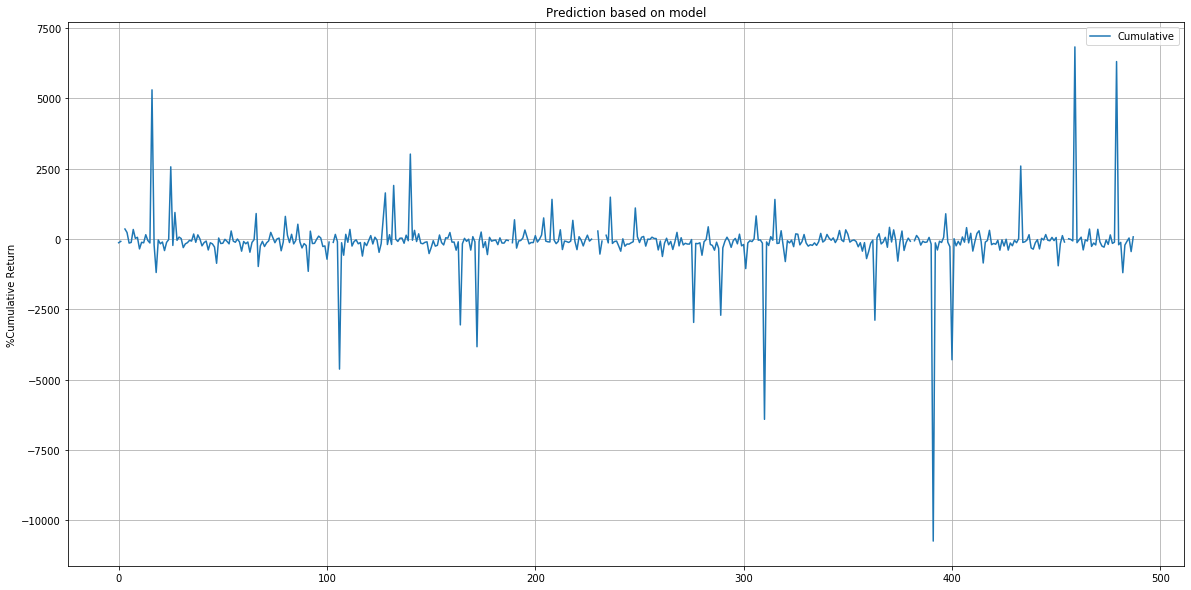

In [58]:
from matplotlib import pyplot as plt
df5.plot(y='Cumulative', figsize = (20,10)) 
plt.grid(True)
plt.title("Prediction based on model")
plt.ylabel("%Cumulative Return")